In [16]:
#Task 6- HOUSE PRICE PREDICTION 

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# 1. Load Dataset
data = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [10]:
# 2. Select Features
numerical_features = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]
categorical_features = ["Location", "Condition", "Garage"]

label = "Price"

X = data[numerical_features + categorical_features]
y = data[label]

In [11]:
# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

In [12]:
# 4. Model (Gradient Boosting performs well)
model = GradientBoostingRegressor(random_state=42)

pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", model)
])

In [ ]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# 6. Train
pipeline.fit(X_train, y_train)

# 7. Predict
preds = pipeline.predict(X_test)

In [14]:
# 8. Evaluation
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE :", mae)
print("RMSE:", rmse)

MAE : 247148.35901676456
RMSE: 285735.57975014887


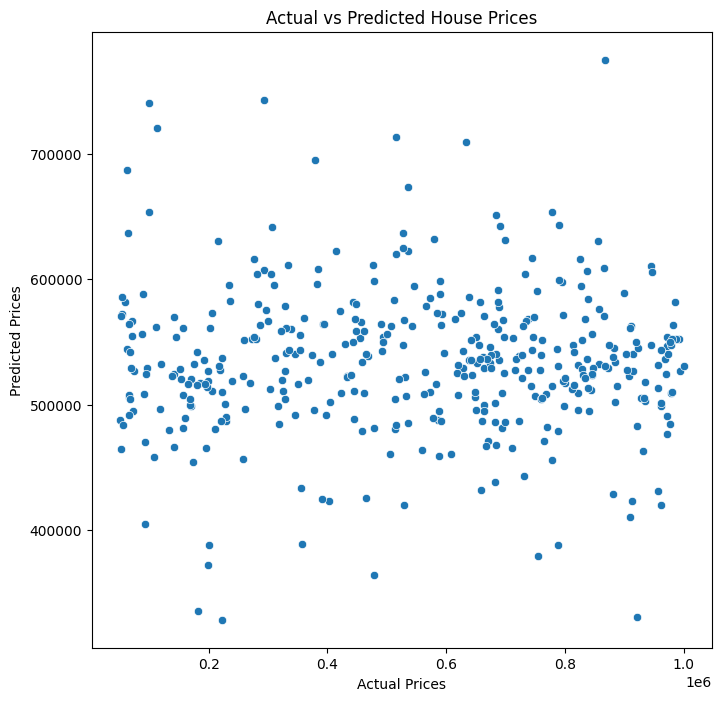

In [15]:
# 9. Visualization: Actual vs Predicted
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()